In [25]:
pip install ucimlrepo

In [26]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset = fetch_ucirepo(id=887)

# data (as pandas dataframes)
X = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.features
y = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.targets

# metadata
print(national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.metadata)

# variable information
print(national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.variables)


{'uci_id': 887, 'name': 'National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset', 'repository_url': 'https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset', 'data_url': 'https://archive.ics.uci.edu/static/public/887/data.csv', 'abstract': "The National Health and Nutrition Examination Survey (NHANES), administered by the Centers for Disease Control and Prevention (CDC), collects extensive health and nutritional information from a diverse U.S. population. Though expansive, the dataset is often too broad for specific analytical purposes. In this sub-dataset, we narrow our focus to predicting respondents' age by extracting a subset of features from the larger NHANES dataset. These selected features include physiological measurements, lifestyle choices, and biochemical markers, which were hypothesized to have strong correlations with age.", 'area': 'Health and Medicine', 'tasks': ['Classifi

In [27]:
import pandas as pd
import numpy as np

# Assuming X and y are already loaded from the ucimlrepo in a previous cell
# If this cell is run independently, X and y might not be defined.
# For the current notebook state, X and y are defined from cell R02k05YoncFi.

print("\n========= Features (X) Dataset summary ========= \n")
if 'X' in locals():
    X.info()
    print("\n========= Features (X) A few first samples ========= \n")
    print(X.head())
else:
    print("X dataframe not found. Please ensure it is loaded before running this cell.")

print("\n========= Targets (y) Dataset summary ========= \n")
if 'y' in locals():
    y.info()
    print("\n========= Targets (y) A few first samples ========= \n")
    print(y.head())
else:
    print("y dataframe not found. Please ensure it is loaded before running this cell.")


========= Features (X) Dataset summary ========= 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  2278 non-null   float64
 1   PAQ605    2278 non-null   float64
 2   BMXBMI    2278 non-null   float64
 3   LBXGLU    2278 non-null   float64
 4   DIQ010    2278 non-null   float64
 5   LBXGLT    2278 non-null   float64
 6   LBXIN     2278 non-null   float64
dtypes: float64(7)
memory usage: 124.7 KB

========= Features (X) A few first samples ========= 

   RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN
0       2.0     2.0    35.7   110.0     2.0   150.0  14.91
1       2.0     2.0    20.3    89.0     2.0    80.0   3.85
2       1.0     2.0    23.2    89.0     2.0    68.0   6.14
3       1.0     2.0    28.9   104.0     2.0    84.0  16.15
4       2.0     1.0    35.9   103.0     2.0    81.0  10.92

========= Targets (y) Dataset summary 

In [28]:
from sklearn.model_selection import train_test_split
Xa, Xt, Ya, Yt = train_test_split(X, y_transformed, shuffle=True, test_size=1/3,
stratify=y_transformed)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.5,
stratify=Ya)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
# Fit the model on (Xa, Ya)
k = 3
clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(Xa, Ya)
# Predict the labels of samples in Xv
Ypred_v = clf.predict(Xv)
# evaluate classification error rate
from sklearn.metrics import accuracy_score
error_v = 1-accuracy_score(Yv, Ypred_v)

In [30]:
# some hints
k_vector = np.arange(1, 37, 2) #define a vector of k=1, 3, 5, ...
error_train = np.empty(k_vector.shape)
error_val = np.empty(k_vector.shape)
for ind, k in enumerate(k_vector):
    #fit with k
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(Xa, Ya)
    # predict and evaluate on training and validation sets
    Ypred_train = clf.predict(Xa)
    error_train[ind] = 1 - accuracy_score(Ya, Ypred_train)
    Ypred_val = clf.predict(Xv)
    error_val[ind] = 1 - accuracy_score(Yv, Ypred_val)

In [31]:
# The original code was attempting to split a dataframe named 'df' into features and targets.
# However, the dataset has already been loaded into 'X' and 'y' dataframes in a previous cell.
# 'X' contains the features and 'y' contains the target variable 'age_group'.
# This cell will now display the value counts of the 'age_group' target variable.

print("\n========= Age Group Distribution ========= \n")
print(y['age_group'].value_counts())


========= Age Group Distribution ========= 

age_group
Adult     1914
Senior     364
Name: count, dtype: int64


In [32]:
# Convert the 'age_group' target variable into numerical labels for classification.
# Assuming 'Adult' maps to 0 and 'Senior' maps to 1 for binary classification.
y_transformed = y['age_group'].apply(lambda x: 1 if x == 'Senior' else 0)

print("\n========= Transformed Target (y_transformed) Distribution ========= \n")
print(y_transformed.value_counts())
print("\n========= Transformed Target (y_transformed) First few samples ========= \n")
print(y_transformed.head())


========= Transformed Target (y_transformed) Distribution ========= 

age_group
0    1914
1     364
Name: count, dtype: int64

========= Transformed Target (y_transformed) First few samples ========= 

0    0
1    0
2    0
3    0
4    0
Name: age_group, dtype: int64


/tmp/ipython-input-1567604800.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


<Axes: >

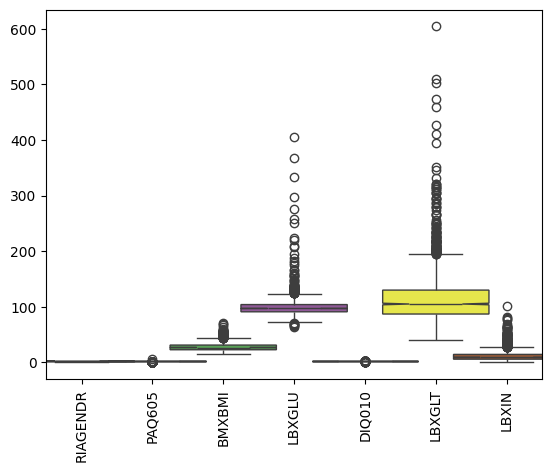

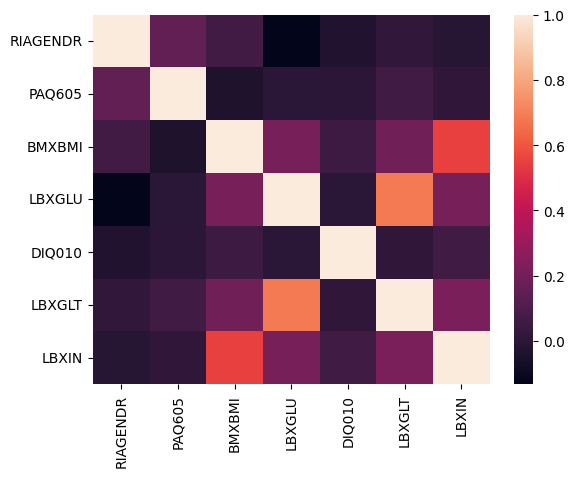

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
ax = plt.gca()
sns.boxplot(data=X,orient="v",palette="Set1",width=1.5, notch=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure()
corr = X.corr()
sns.heatmap(corr)


/tmp/ipython-input-1263214469.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


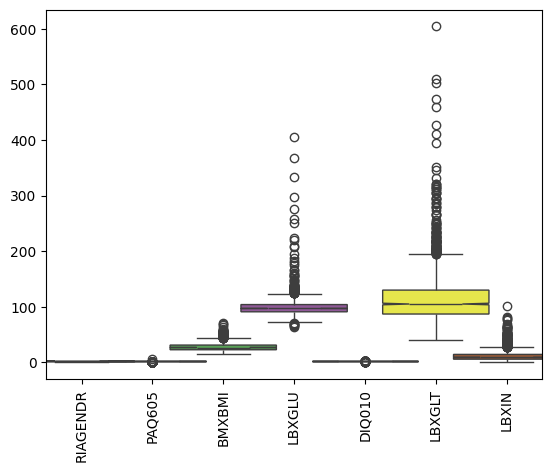

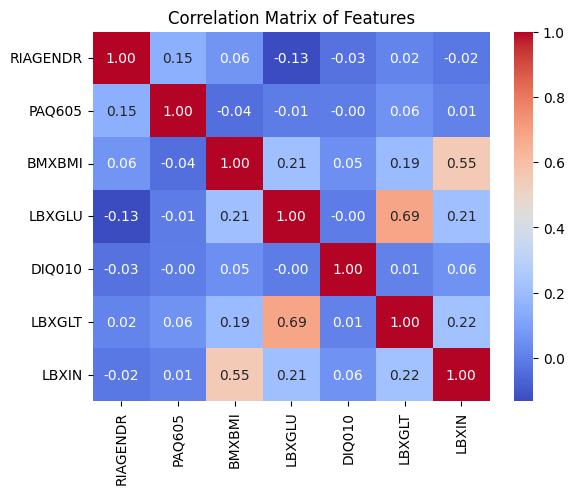

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
ax = plt.gca()
sns.boxplot(data=X,orient="v",palette="Set1",width=1.5, notch=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show() # Ensure the boxplot is displayed

plt.figure()
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f") # Added annot, cmap, and fmt for better visualization
plt.title('Correlation Matrix of Features') # Add a title for clarity
plt.show() # Display the heatmap